In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
pbd = pd.read_csv('../input/phone_brand_device_model.csv', dtype={'device_id': np.str})

In [3]:
pbd.head()

,device_id,phone_brand,device_model
0,-8890648629457979026,小米,红米
1,1277779817574759137,小米,MI 2
2,5137427614288105724,三星,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,三星,Galaxy Note 2


In [4]:
pbd['phone_type'] = pbd[['phone_brand','device_model']].apply(lambda x: ''.join(x), axis=1)
pbd = pbd[['device_id','phone_type']]
pbd.head()

,device_id,phone_type
0,-8890648629457979026,小米红米
1,1277779817574759137,小米MI 2
2,5137427614288105724,三星Galaxy S4
3,3669464369358936369,SUGAR时尚手机
4,-5019277647504317457,三星Galaxy Note 2


In [5]:
x = collections.Counter(pbd['phone_type'])
phone_type_count = pd.DataFrame(list(x.items()))
phone_type_count.columns = ['phone_type', 'Count']
phone_type_count = phone_type_count.sort_values(by='Count', ascending=False)
phone_type_count.head(20)

,phone_type,Count
345,小米红米note,7358
1012,小米MI 3,5712
1565,小米MI 2S,5308
189,三星Galaxy Note 3,5019
1082,小米MI 4,4798
1137,三星Galaxy S4,4059
931,三星Galaxy Note 2,3993
1458,华为荣耀6,3076
417,华为荣耀畅玩4X,2754
919,华为荣耀3C,2598


<IPython.core.display.Javascript object>


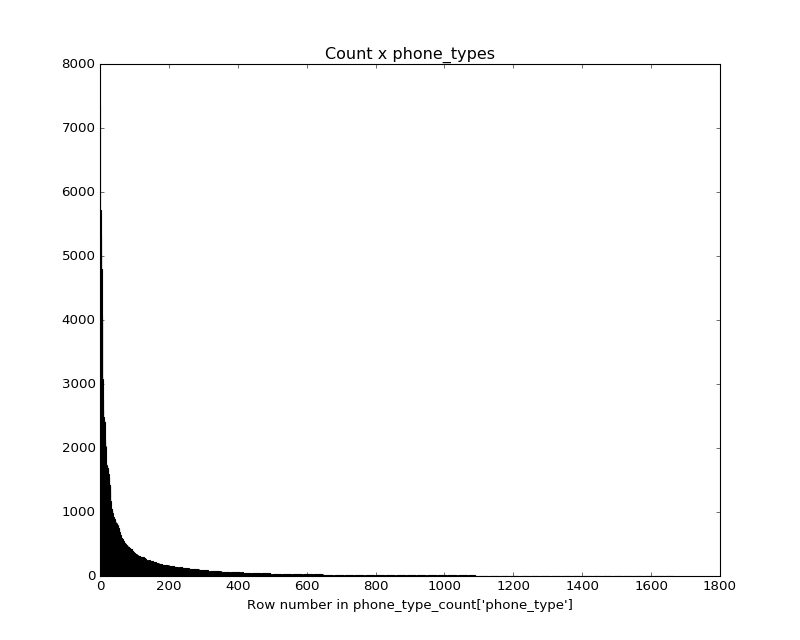

In [6]:
l = range(len(phone_type_count))
plt.figure(figsize=(10,8))
plt.bar(l, phone_type_count.ix[:,1])
plt.xlabel("Row number in phone_type_count['phone_type']")
plt.title('Count x phone_types')